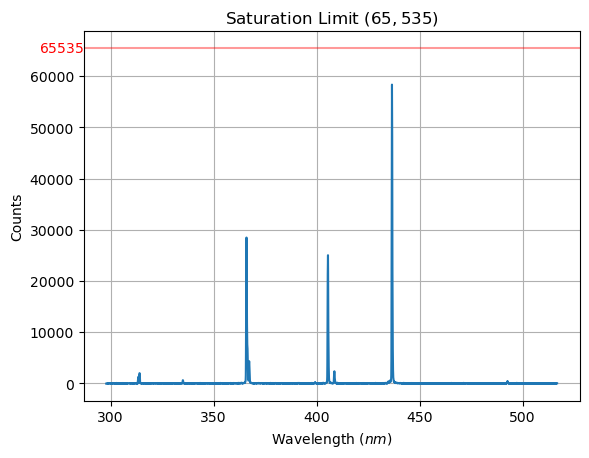

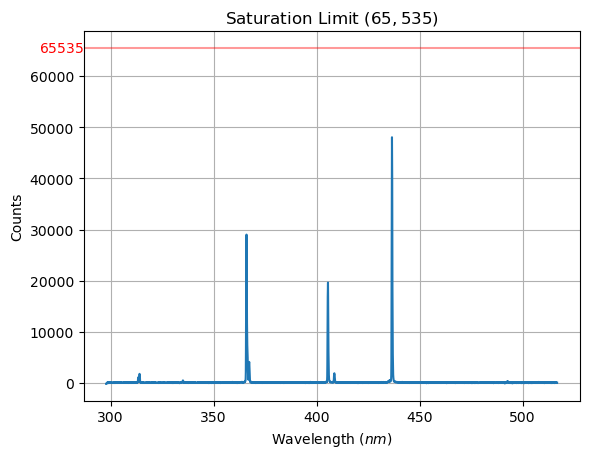

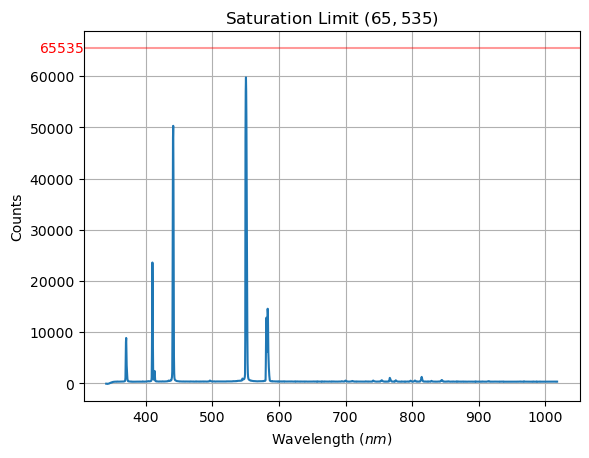

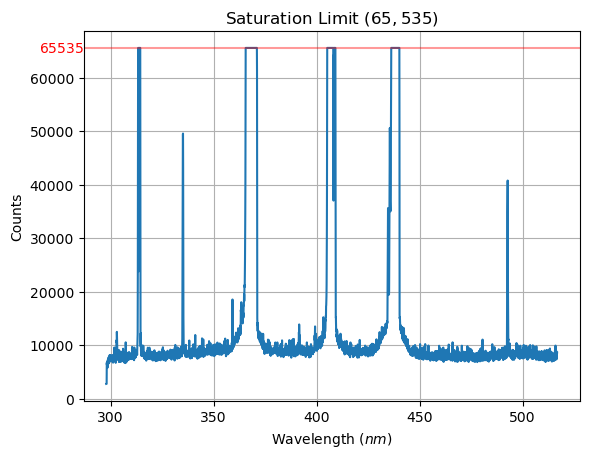

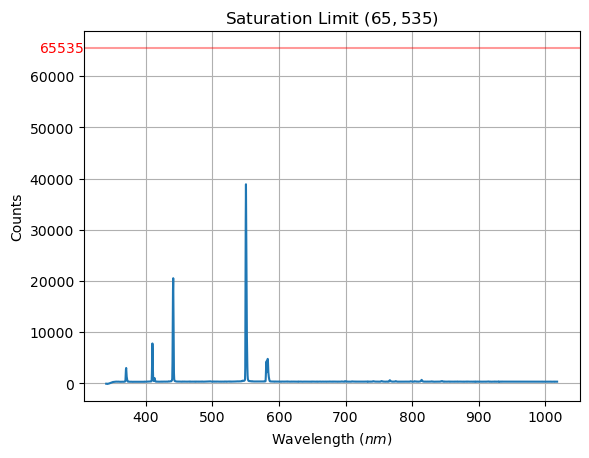

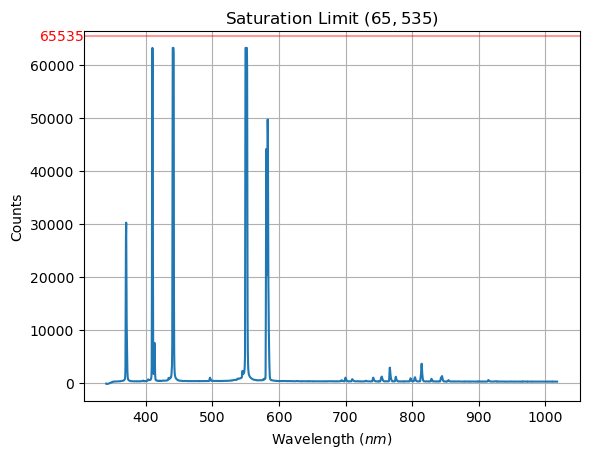

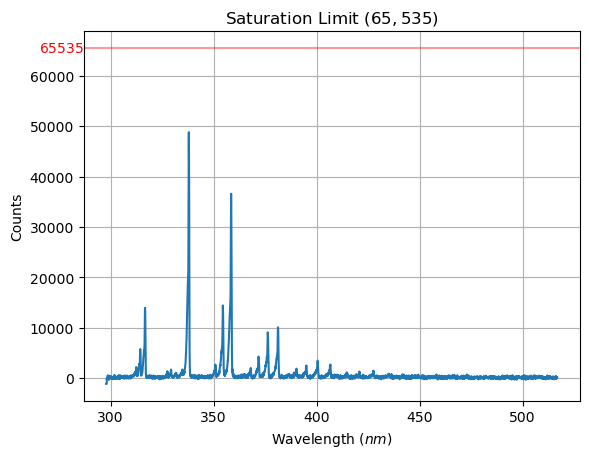

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file paths and names
file_paths = {
    'MercTEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryDarkClose1_FLMT016052_11-57-24-770.txt',
    'MercTNoEDark': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryNoDarkClose1_FLMT016052_11-33-03-669.txt',
    'MercSSpec': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercuryS_FLMS043641_12-39-11-815.txt',
    'MercTSaturated': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySATURATED_FLMT016052_11-30-39-931.txt',
    'MercS_big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySBigPeaks_FLMS043641_12-36-23-480.txt',
    'MercS_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp1/MercurySSmallPeaks_FLMS043641_12-37-59-611.txt',
    'N2_Big': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TBigPeaks_FLMT016052_12-53-00-515.txt',
}

# Load the data into a dictionary
data_frames = {name: pd.read_csv(path, delim_whitespace=True, names=['Wavelength', 'Counts']) for name, path in file_paths.items()}

sorted_data_frames = {name: df.sort_values(by='Counts') for name, df in data_frames.items()}

# Print the data frames
# for name, df in sorted_data_frames.items():
#     print(f"{name}:(Sorted by Count)\n{df}\n")


# Example usage of one of the data frames
for name, df in data_frames.items():
    plt.plot(df['Wavelength'], df['Counts'], label=name)
    plt.xlabel('Wavelength $(nm)$')
    plt.ylabel('Counts')
    plt.title('Saturation Limit $(65,535)$')
    plt.axhline(y=65535, color='red', alpha=0.4)
    plt.text(plt.xlim()[0], 65535, '$65535$', va='center', ha='right', color='red')
    plt.grid()
    # plt.xlim(434, 440)
    # plt.ylim(0, )
    plt.show()
    plt.close()

     Wavelength     Counts
216     313.053   440.7521
217     313.122   674.2206
218     313.192   721.0313
219     313.262   766.3792
220     313.331   849.1756
221     313.401  1139.6946
222     313.471  1207.2776
223     313.541  1386.3286
224     313.610  1927.8700
225     313.680  2100.1920
226     313.750  2280.9983
[3.42481353e+05 1.49032574e+00 3.18452062e+02] [[3.38725123e+13 1.32909304e+07 8.85902301e+07]
 [1.32909304e+07 5.22308044e+00 3.47872228e+01]
 [8.85902301e+07 3.47872228e+01 2.31784607e+02]]


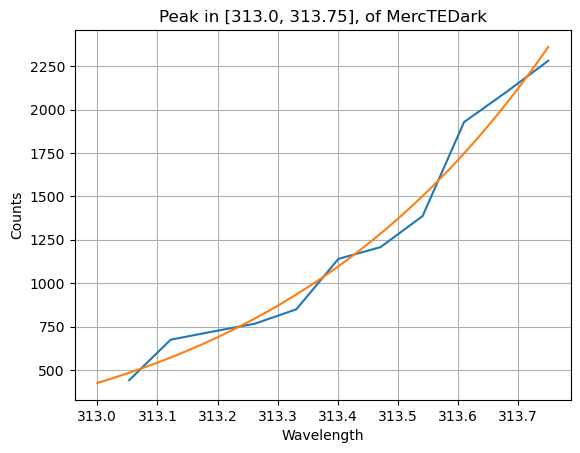

In [3]:
import numpy as np
from scipy.optimize import curve_fit

def gaussian(x, a, b, c):
    return a * np.exp(-(x - c)**2/(2*b**2))


def fit_gaussian(df_, q):
    params, covar = curve_fit(gaussian, df_['Wavelength'], df_['Counts'], p0=q, maxfev=1000000)
    return params, covar

def fitpeakfunc(df, ranges, name):
    df_is = (df['Wavelength']>=ranges[0]) & (df['Wavelength']<=ranges[1])
    df = df[df_is]
    mean = sum(df['Counts']*df['Wavelength'])/sum(df['Counts'])
    sig = np.sqrt(sum(df['Counts']*(df['Wavelength']-mean)**2)/sum(df['Counts']))
    q = [max(df['Counts']),sig, mean]
    print(df)
    params, covar = fit_gaussian(df, q)
    print(params, covar)
    plt.figure()
    plt.plot(df['Wavelength'], df['Counts'], label='Data')
    plt.plot(np.linspace(ranges[0], ranges[1], 10*len(df)), gaussian(np.linspace(ranges[0], ranges[1], 10*len(df)), *params), label='Fit')
    # plt.fill_between(df['Wavelength'], gaussian(df['Wavelength'], *params-(np.diag(covar))^2), gaussian(df['Wavelength'], *params+(np.diag(covar))^2), alpha=0.5)
    plt.xlabel('Wavelength')
    plt.ylabel('Counts')
    plt.title(f'Peak in {ranges}, of {name}')
    plt.grid()
    # plt.savefig(f'Peak in {ranges}, of {name}.png')
    plt.show()

    return params, covar

q = fitpeakfunc(data_frames['N2_Big'], [313., 313.75], 'MercTEDark')

Identified peaks at indices: [ 222  230  536 1001 1021 1628 1679 2149]
Peak 0
     Wavelength     Counts
218     313.192   177.2346
219     313.262   616.5239
220     313.331  1114.1803
221     313.401  1266.7540
222     313.471  1288.2577
223     313.541  1168.4515
224     313.610   778.3135
225     313.680   269.3932
226     313.750   148.5631
[1.38776019e+03 1.42055111e-01 3.13445920e+02] [[ 3.46004569e+03 -2.53219114e-01  5.56636773e-03]
 [-2.53219114e-01  5.27533049e-05 -1.48246592e-06]
 [ 5.56636773e-03 -1.48246592e-06  4.78991756e-05]]


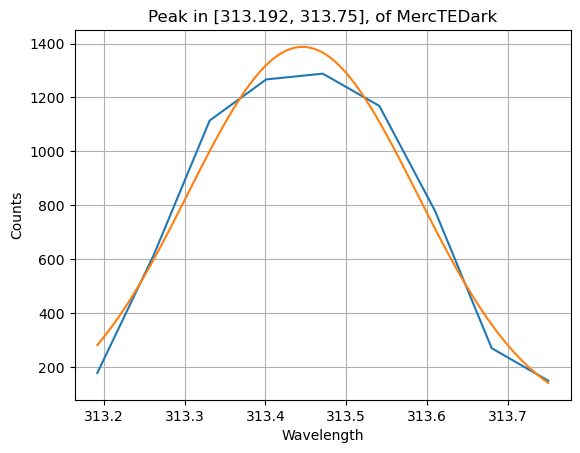

Peak 1
     Wavelength     Counts
226     313.750   148.5631
227     313.819   493.6458
228     313.889  1264.7060
229     313.959  1910.8402
230     314.028  2007.0947
231     314.098  1979.4471
232     314.168  1638.4603
233     314.237   878.6639
234     314.307   221.2660
[2.18058965e+03 1.39515290e-01 3.14045449e+02] [[ 8.21791121e+03 -3.70708046e-01 -4.21366650e-03]
 [-3.70708046e-01  4.81897584e-05  7.35196829e-07]
 [-4.21366650e-03  7.35196829e-07  4.46399611e-05]]


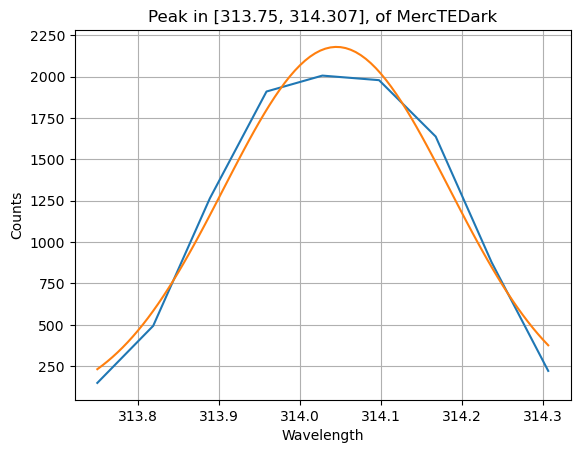

Peak 2
     Wavelength    Counts
532     334.786   10.3252
533     334.854  240.7217
534     334.922  388.1754
535     334.990  519.2454
536     335.058  635.9796
537     335.125  583.7564
538     335.193  469.0702
539     335.261  286.8010
540     335.329   96.3399
[6.39371006e+02 1.42869742e-01 3.35073139e+02] [[ 7.11401880e+02 -1.14791823e-01 -2.17637195e-03]
 [-1.14791823e-01  5.27741064e-05  1.19186374e-06]
 [-2.17637195e-03  1.19186374e-06  4.74544223e-05]]


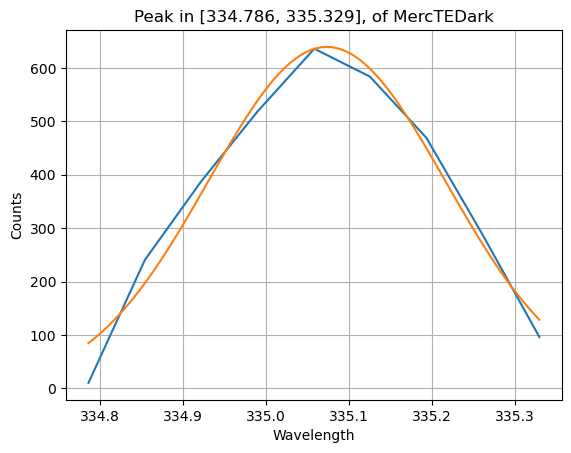

Peak 3
      Wavelength      Counts
997      365.669   5699.5824
998      365.734  14817.1392
999      365.799  21798.6647
1000     365.864  27060.9204
1001     365.929  28491.4266
1002     365.994  27836.0766
1003     366.058  21115.6671
1004     366.123  14064.5107
1005     366.188  11610.0202
[2.91417531e+04 1.65970306e-01 3.65934593e+02] [[ 1.02103590e+06 -4.88502834e+00 -8.32830275e-02]
 [-4.88502834e+00  6.10368004e-05  1.21419157e-06]
 [-8.32830275e-02  1.21419157e-06  4.48564981e-05]]


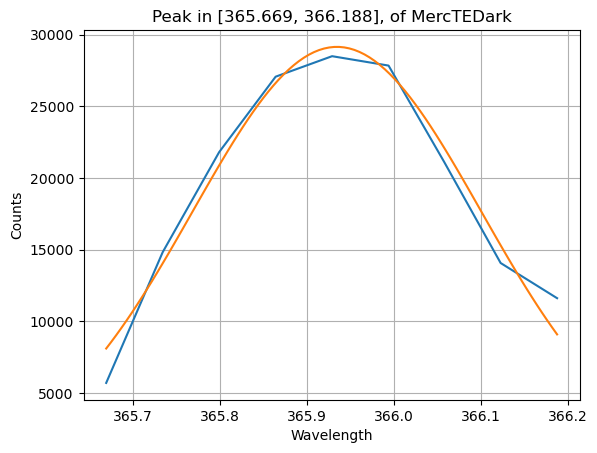

Peak 4
      Wavelength     Counts
1017     366.967  1016.9018
1018     367.032  2264.1148
1019     367.097  3447.8407
1020     367.162  4040.7277
1021     367.227  4343.8271
1022     367.292  4148.2460
1023     367.357  3315.7467
1024     367.422  2068.5338
1025     367.486  1445.9513
[4.44450666e+03 1.64429737e-01 3.67227677e+02] [[ 1.03926078e+04 -3.18948133e-01 -4.74403320e-04]
 [-3.18948133e-01  2.56847914e-05  3.36579273e-08]
 [-4.74403320e-04  3.36579273e-08  1.91627366e-05]]


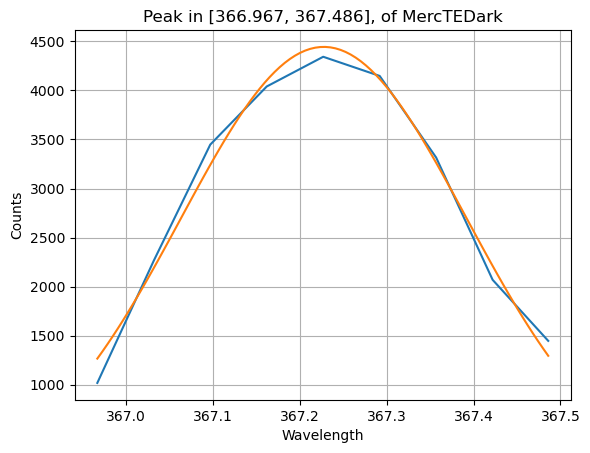

Peak 5
      Wavelength      Counts
1624     405.237  11041.7088
1625     405.299  17429.3234
1626     405.360  21365.5193
1627     405.421  24308.4504
1628     405.482  25043.6712
1629     405.543  21919.4949
1630     405.605  14941.0413
1631     405.666  10687.4103
1632     405.727   7628.7689
[2.49265297e+04 1.69343243e-01 4.05448770e+02] [[ 2.63290228e+05 -1.65611597e+00  1.61996666e-01]
 [-1.65611597e+00  2.65161379e-05 -3.65284025e-06]
 [ 1.61996666e-01 -3.65284025e-06  1.77452428e-05]]


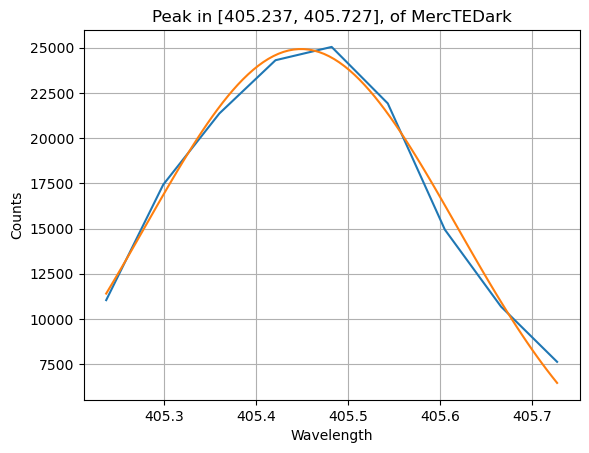

Peak 6
      Wavelength     Counts
1675     408.351  1157.1877
1676     408.412  1772.6023
1677     408.473  2052.1500
1678     408.534  2250.8030
1679     408.595  2369.5852
1680     408.656  2142.2606
1681     408.716  1493.0546
1682     408.777  1070.1490
1683     408.838   773.1935
[2.35707455e+03 1.78584551e-01 4.08559205e+02] [[ 3.05980482e+03 -2.30938216e-01  2.48535065e-02]
 [-2.30938216e-01  4.31913018e-05 -6.86565634e-06]
 [ 2.48535065e-02 -6.86565634e-06  2.65988876e-05]]


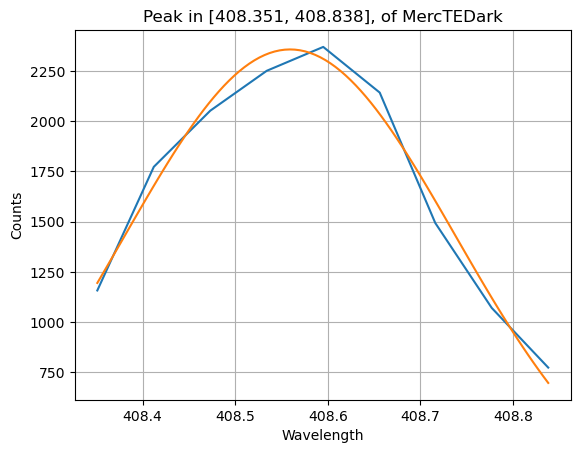

Peak 7
      Wavelength      Counts
2145     436.306  14906.2259
2146     436.364  34163.2760
2147     436.422  44970.4071
2148     436.480  54368.5357
2149     436.538  58367.1947
2150     436.596  53418.2782
2151     436.654  48141.6867
2152     436.713  30859.9024
2153     436.771  22214.4024
[5.87662299e+04 1.57977899e-01 4.36542314e+02] [[ 2.62128660e+06 -6.30809528e+00 -6.40586965e-02]
 [-6.30809528e+00  3.85784086e-05  6.52484951e-07]
 [-6.40586965e-02  6.52484951e-07  2.61441986e-05]]


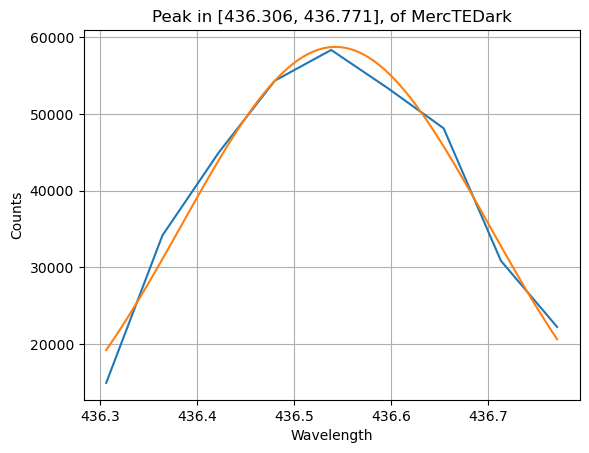

In [153]:
from scipy.signal import find_peaks

def identify_and_fit_peaks(df, name, width, fittingfunction, height=None, distance=None, prominence=None):
    # Identify peaks
    peaks, properties = find_peaks(df['Counts'], height=height, distance=distance, prominence=prominence)
    print(f"Identified peaks at indices: {peaks}")
    sigma_list = []
    sigma_error_list = []
    mean_list = []
    mean_error_list = []
    i=0
    # Fit Gaussian to each identified peak
    for peak in peaks:
        print(f'Peak {i}')
        peak_height = properties['peak_heights'][np.where(peaks == peak)][0]
        peak_range = [df['Wavelength'].iloc[max(0, peak-width)], df['Wavelength'].iloc[min(len(df)-1, peak+width)]]
        params, covar = fittingfunction(df, peak_range, name)
        sigma_list.append(params[1])
        sigma_error_list.append(np.sqrt(covar[1,1]))
        mean_list.append(params[2])
        mean_error_list.append(np.sqrt(covar[2,2]))
        i+=1

    # Create a dictionary from the lists
    data = {'sigma': sigma_list, 'sigmaErr': sigma_error_list , 'mean': mean_list, 'meanErr': mean_error_list, 'tomeanErr':np.sqrt(np.array(sigma_list)**2 + np.array(mean_error_list)**2)}
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)
    # Save the DataFrame to a CSV file
    df.to_csv(f'output{name}.csv', index=False)

# identify_and_fit_peaks(data_frames['MercTEDark'], 'MercTEDark', width=8, height=600, distance=10, prominence=600)
identify_and_fit_peaks(data_frames['MercTEDark'], 'MercTEDark', 4, fitpeakfunc, height=500, distance=5, prominence=500)

[0.00099811] [[1.9470117e-10]]
[0.00295544] [[1.90202849e-09]]


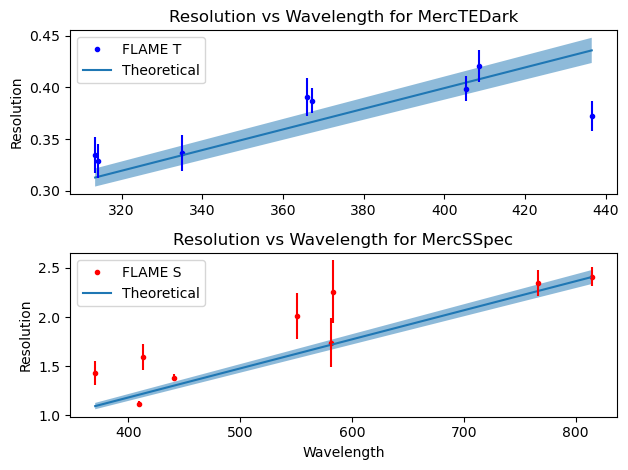

In [131]:
import numpy as np
from scipy.optimize import curve_fit

def linear(x, m):
    return m*x

def fit_linear(df_, q):
    params, covar = curve_fit(linear, df_['mean'], df_['FWHM'], p0=q, sigma=df_['FWHMErr'], absolute_sigma=True, maxfev=1000000)
    return params, covar

Opt_res_T_df = pd.read_csv('outputMercTEDark.csv')
Opt_res_S_df = pd.read_csv('outputMercSSpec.csv')
Opt_res_T_df['FWHM'] = 2.355*Opt_res_T_df['sigma']
Opt_res_T_df['FWHMErr'] = 2.355*Opt_res_T_df['sigmaErr']
Opt_res_S_df['FWHM'] = 2.355*Opt_res_S_df['sigma']
Opt_res_S_df['FWHMErr'] = 2.355*Opt_res_S_df['sigmaErr']
# print(Opt_res_T_df['FWHM'], Opt_res_T_df['FWHMErr'])

params, covar = fit_linear(Opt_res_T_df, [0.00000004])
params2, covar2 = fit_linear(Opt_res_S_df, [0.00000013])
print(params, covar)
print(params2, covar2)


# print(Opt_res_S_df['FWHM'], Opt_res_S_df['FWHMErr'])
fig, axs = plt.subplots(2)
axs[0].plot(Opt_res_T_df['mean'], Opt_res_T_df['FWHM'], 'ob', markersize=3, label='FLAME T')
axs[0].plot(Opt_res_T_df['mean'], linear(Opt_res_T_df['mean'], params), label='Theoretical')
axs[0].fill_between(Opt_res_T_df['mean'], linear(Opt_res_T_df['mean'], params[0]+2*np.sqrt(covar[0,0])), linear(Opt_res_T_df['mean'], params[0]-2*np.sqrt(covar[0,0])), alpha=0.5)
axs[1].plot(Opt_res_S_df['mean'], Opt_res_S_df['FWHM'], 'or', markersize=3, label='FLAME S')
axs[1].plot(Opt_res_S_df['mean'], linear(Opt_res_S_df['mean'], params2), label='Theoretical')
axs[1].fill_between(Opt_res_S_df['mean'], linear(Opt_res_S_df['mean'], params2[0]+2*np.sqrt(covar2[0,0])), linear(Opt_res_S_df['mean'], params2[0]-2*np.sqrt(covar2[0,0])), alpha=0.5)
axs[0].errorbar(Opt_res_T_df['mean'], Opt_res_T_df['FWHM'], xerr=Opt_res_T_df['meanErr'], yerr=Opt_res_T_df['FWHMErr'], fmt='none', ecolor='b')
axs[1].errorbar(Opt_res_S_df['mean'], Opt_res_S_df['FWHM'], xerr=Opt_res_S_df['meanErr'], yerr=Opt_res_S_df['FWHMErr'], fmt='none', ecolor='r')
axs[1].set_xlabel('Wavelength')
axs[0].set_ylabel('Resolution')
axs[1].set_ylabel('Resolution')
axs[0].set_title('Resolution vs Wavelength for MercTEDark')
axs[1].set_title('Resolution vs Wavelength for MercSSpec')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.savefig('/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Images/ResolutionvsWavelength.png')

Identified peaks at indices: [ 197  207  235  268  426  452  487  533  546  579  771  799  815  826
  836  887  897 1023 1033 1080 1092 1161 1239 1361 1381 1444 1458 1534
 1547 1637 1647 1780 1880 1994]
Peak 0


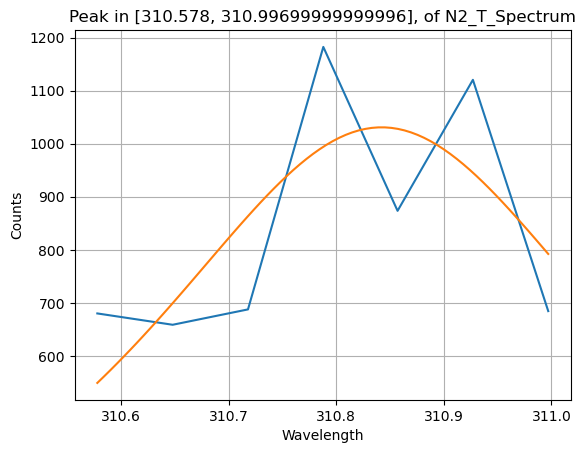

Peak 1


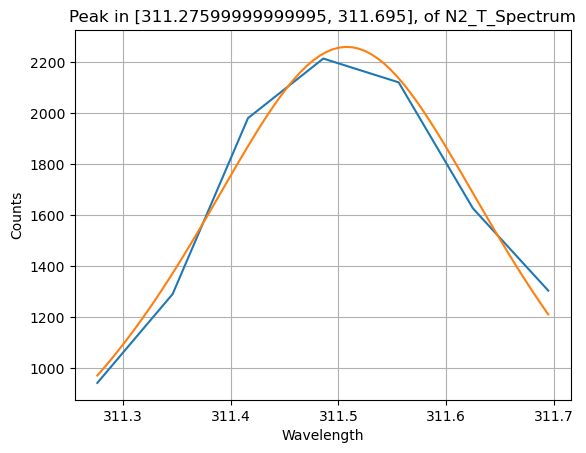

Peak 2


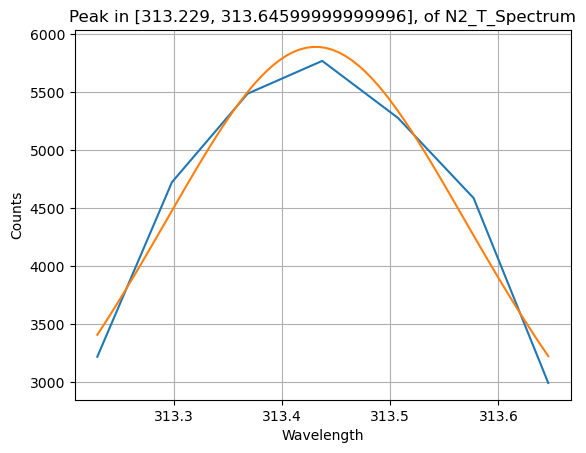

Peak 3


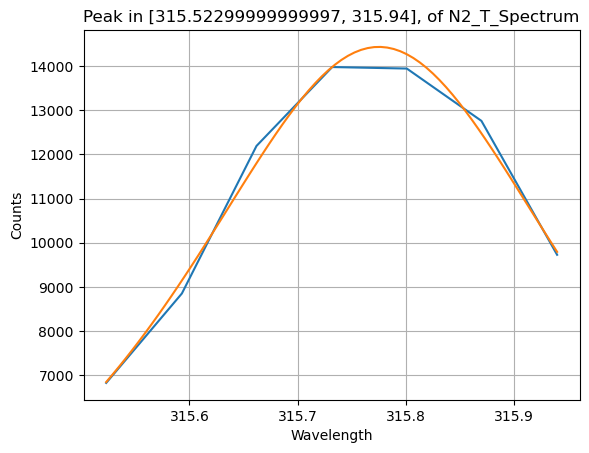

Peak 4


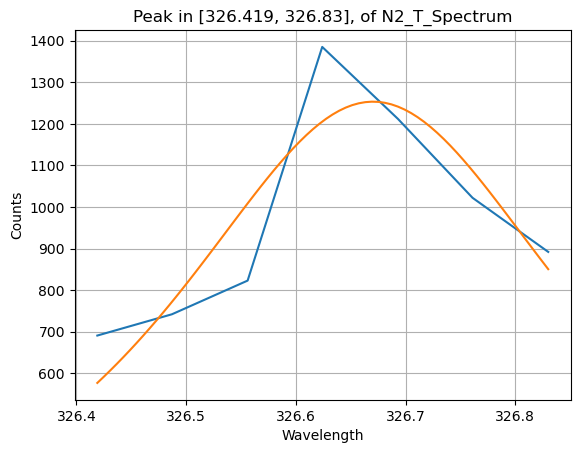

Peak 5


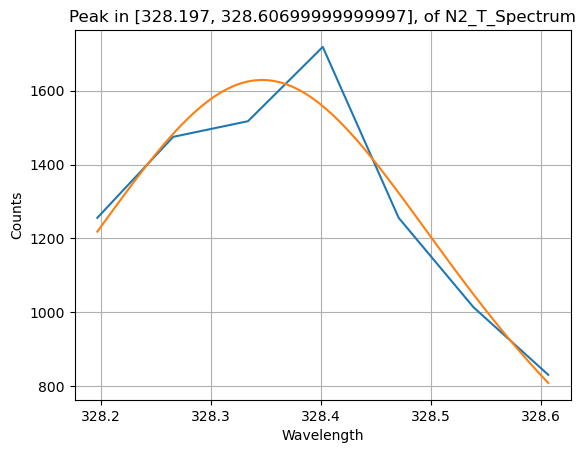

Peak 6


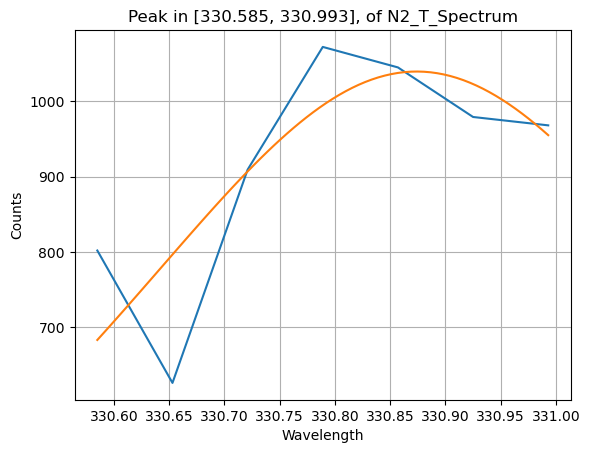

Peak 7


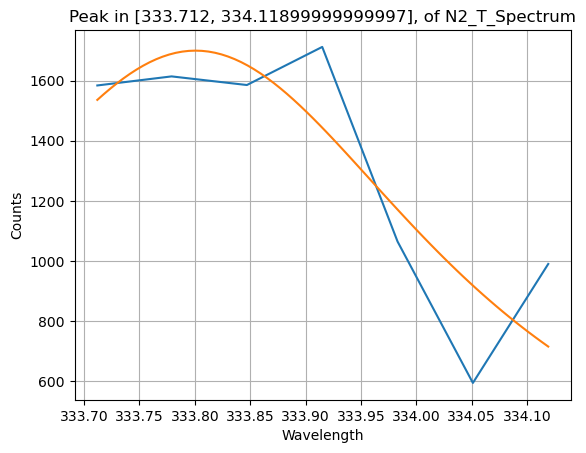

Peak 8


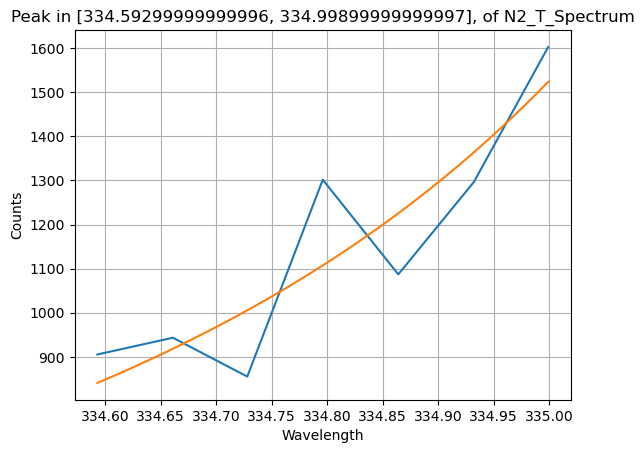

Peak 9


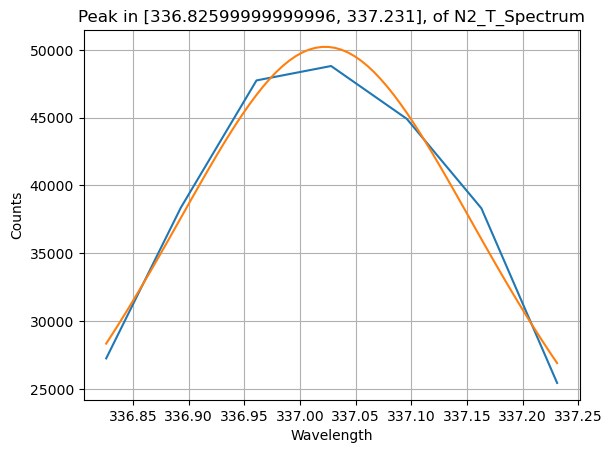

Peak 10


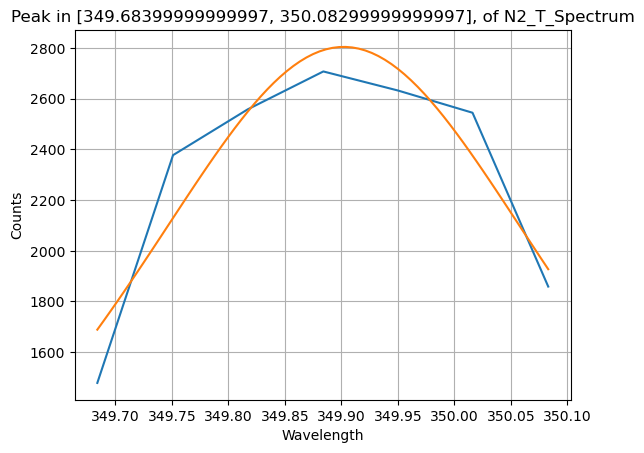

Peak 11


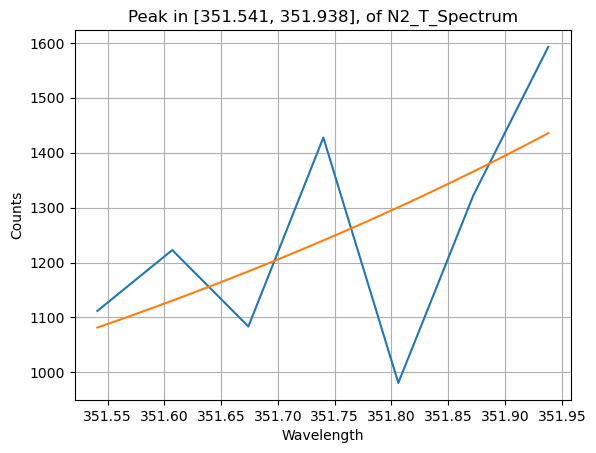

Peak 12


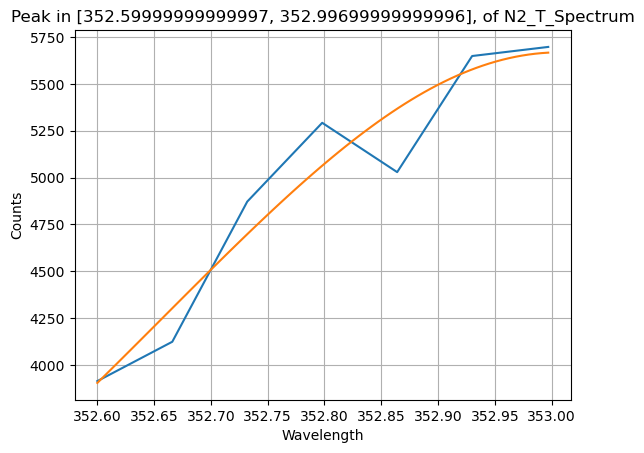

Peak 13


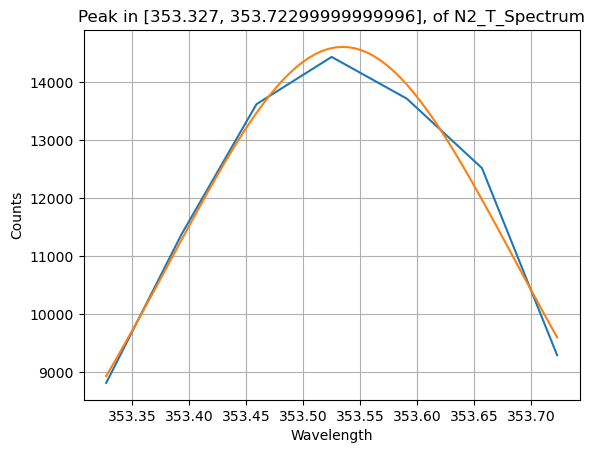

Peak 14


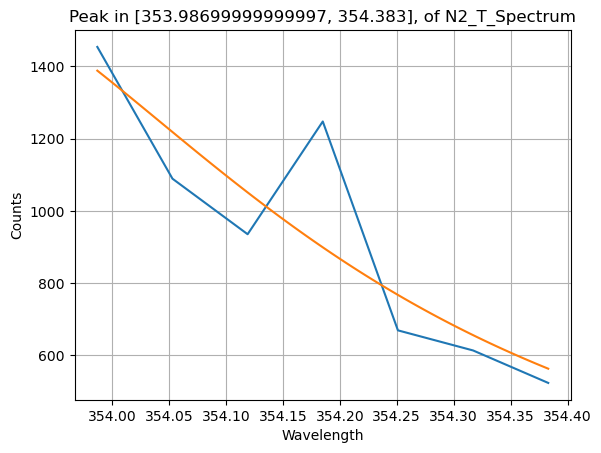

Peak 15


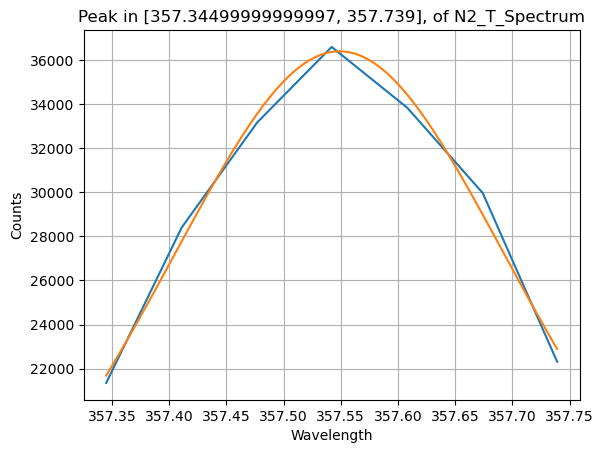

Peak 16


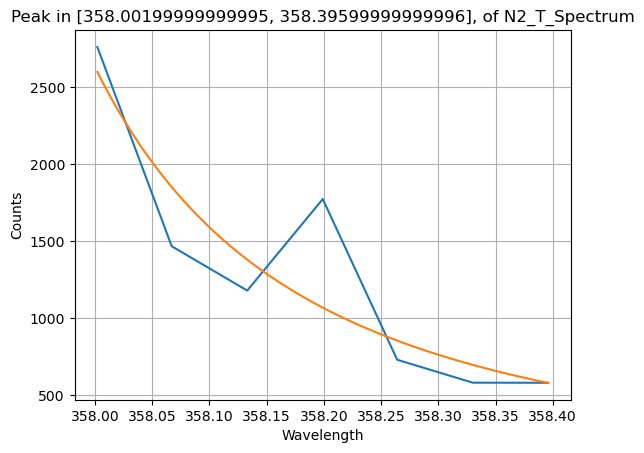

Peak 17


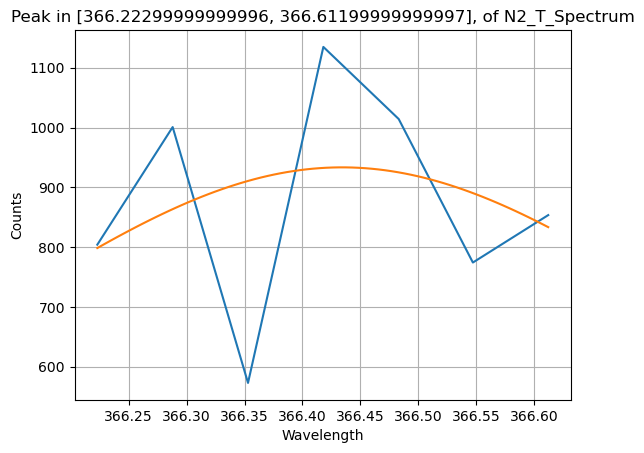

Peak 18


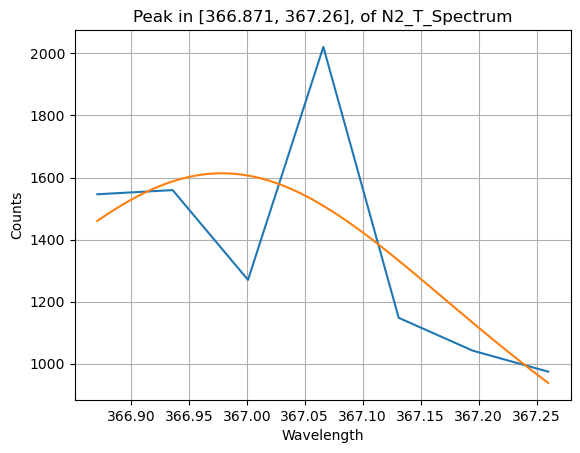

Peak 19


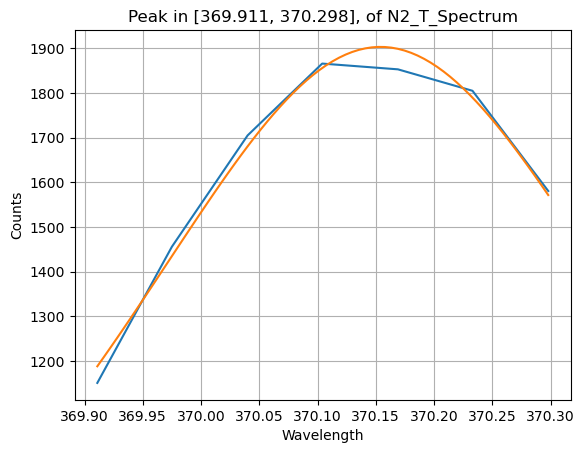

Peak 20


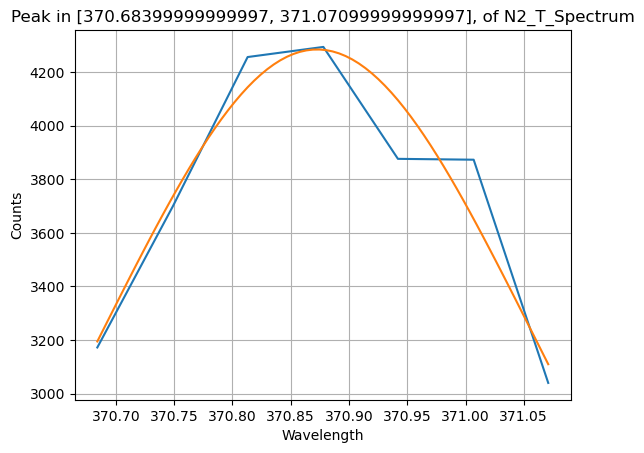

Peak 21


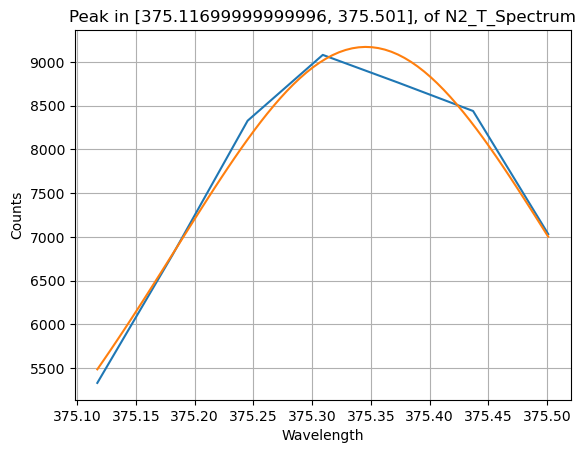

Peak 22


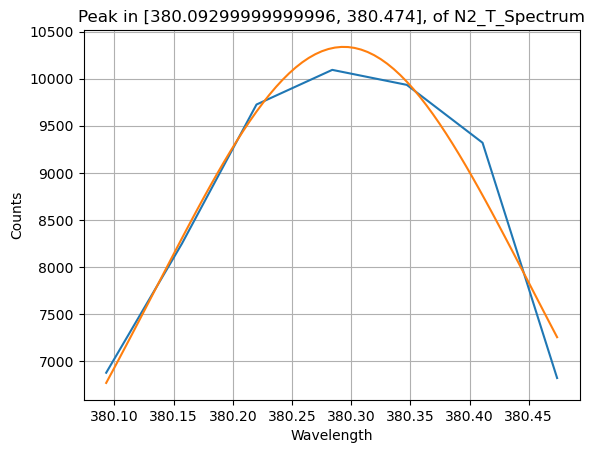

Peak 23


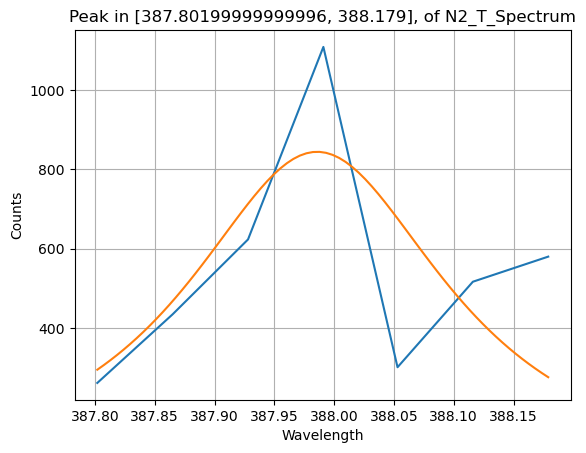

Peak 24


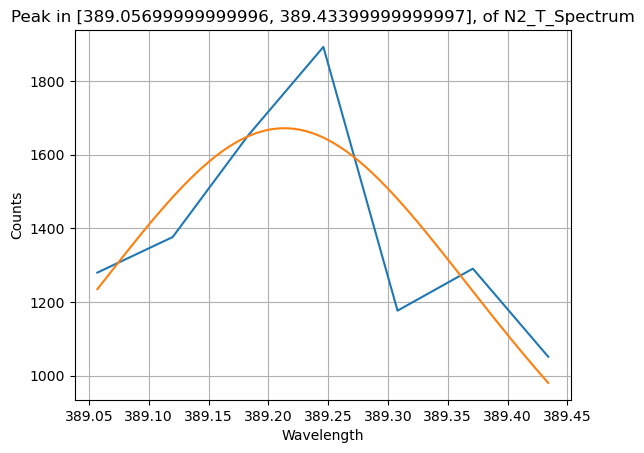

Peak 25


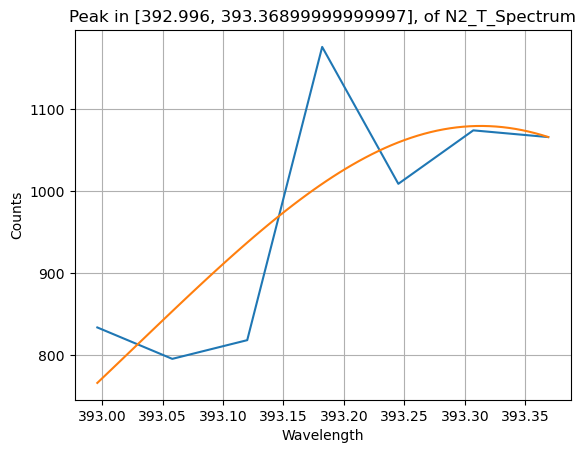

Peak 26


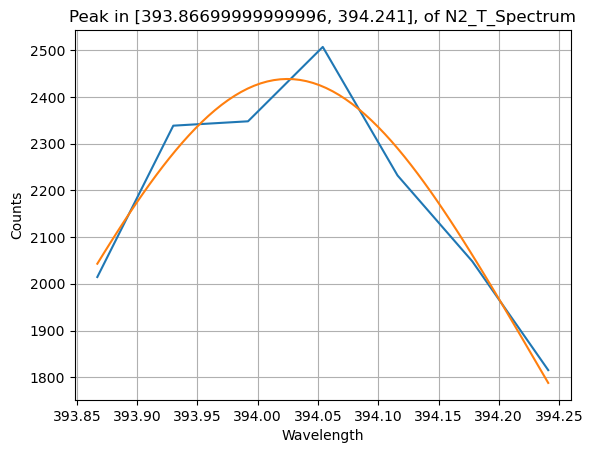

Peak 27


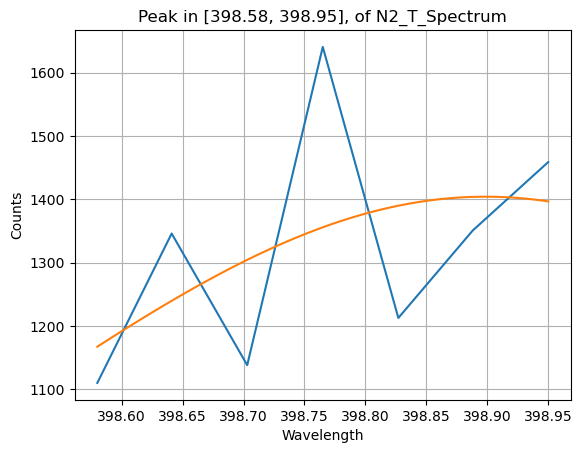

Peak 28


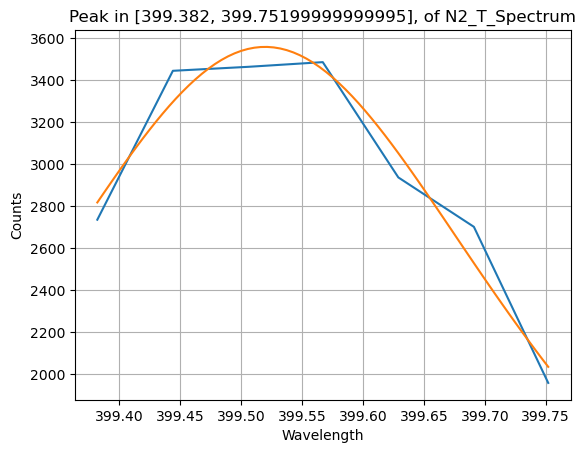

Peak 29


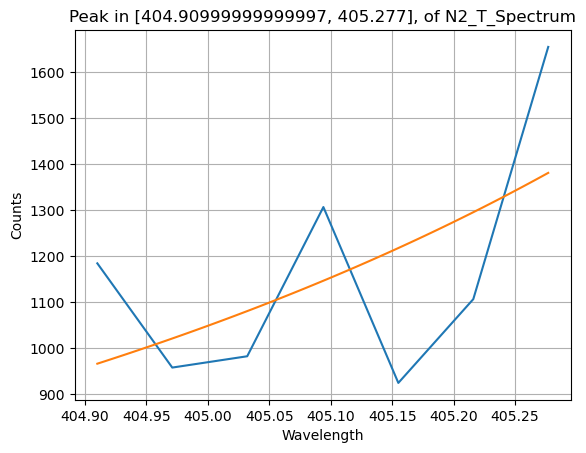

Peak 30


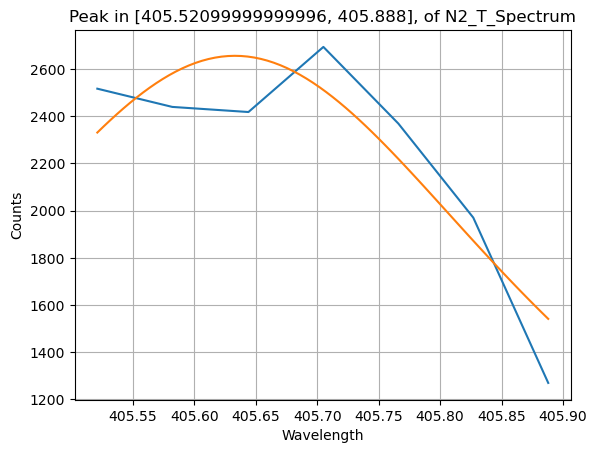

Peak 31


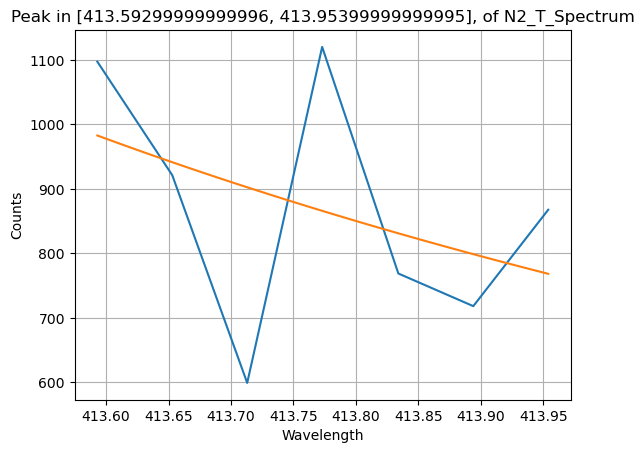

Peak 32


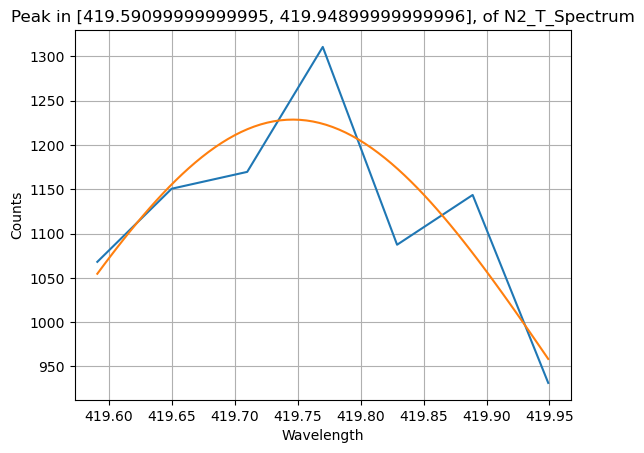

Peak 33


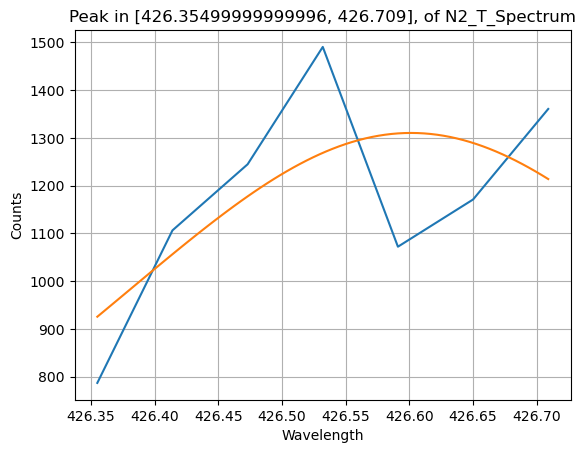

In [160]:
from scipy.stats import cauchy

# Define file paths and names
file_pathsExp2 = {
    'N2_S_Spectrum': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2SBigPeaks_FLMS043641_12-47-08-809.txt',
    'N2_S_Spectrum_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2SSmallPeaks_FLMS043641_12-48-40-027.txt',
    'N2_T_Spectrum': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TBigPeaks_FLMT016052_12-53-00-515.txt',
    'N2_T_Spectrum_small': '/home/dj-lawton/Documents/Junior Sophister/JS Labs/Molecular Spectroscopy/Exp2/N2TSmallPeaks_FLMT016052_12-54-22-853.txt',
}

# Load the data into a dictionary
data_frames2 = {name: pd.read_csv(path, delim_whitespace=True, names=['Wavelength', 'Counts']) for name, path in file_pathsExp2.items()}
data_frames2['N2_S_Spectrum']['Wavelength'] = data_frames2['N2_S_Spectrum']['Wavelength']-4.514
data_frames2['N2_S_Spectrum_small']['Wavelength'] = data_frames2['N2_S_Spectrum_small']['Wavelength']-4.514
data_frames2['N2_T_Spectrum']['Wavelength'] = data_frames2['N2_T_Spectrum']['Wavelength']-0.939
data_frames2['N2_T_Spectrum_small']['Wavelength'] = data_frames2['N2_T_Spectrum_small']['Wavelength']-0.939

def voigt(x, a, gamma, x_0):
    return a * cauchy.pdf(x, x_0, gamma)

def fit_voigt(df_, q):
    params, covar = curve_fit(voigt, df_['Wavelength'], df_['Counts'], p0=q, maxfev=1000000)
    return params, covar

def fitvoigtfunc(df, ranges, name):
    df_is = (df['Wavelength'] >= ranges[0]) & (df['Wavelength'] <= ranges[1])
    df = df[df_is]
    mean = sum(df['Counts'] * df['Wavelength']) / sum(df['Counts'])
    sig = np.sqrt(sum(df['Counts'] * (df['Wavelength'] - mean) ** 2) / sum(df['Counts']))
    q = [max(df['Counts']), sig, mean]
    params, covar = fit_voigt(df, q)
    plt.figure()
    plt.plot(df['Wavelength'], df['Counts'], label='Data')
    plt.plot(np.linspace(ranges[0], ranges[1], 10 * len(df)), voigt(np.linspace(ranges[0], ranges[1], 10 * len(df)), *params), label='Fit')
    plt.xlabel('Wavelength')
    plt.ylabel('Counts')
    plt.title(f'Peak in {ranges}, of {name}')
    plt.grid()
    plt.show()

    return params, covar

# sorted_data_frames = {name: df.sort_values(by='Counts') for name, df in data_frames.items()}

# Print the data frames
# for name, df in data_frames.items():
#     print(f"{name}:(Sorted by Count)\n{df}\n")


# Example usage of one of the data frames
# for name, df in data_frames2.items():
#     plt.plot(df['Wavelength'], df['Counts'], label=name)
#     plt.xlabel('Wavelength (nm)')
#     plt.ylabel('Counts')
#     # plt.xlim([335, 345])
#     plt.show()
#     plt.close()

identify_and_fit_peaks(data_frames2['N2_T_Spectrum'], 'N2_T_Spectrum', 3, fitvoigtfunc, height=1000, distance=10, prominence=200)


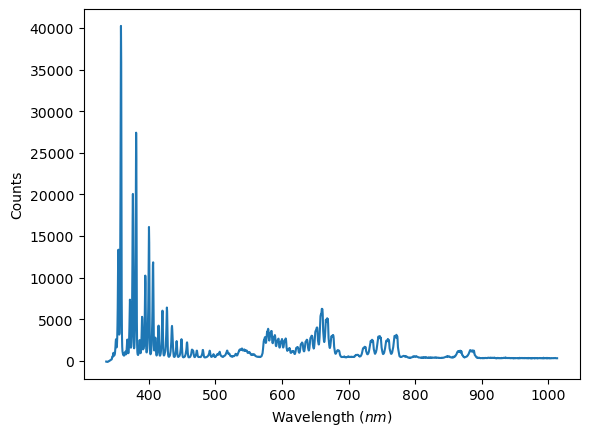

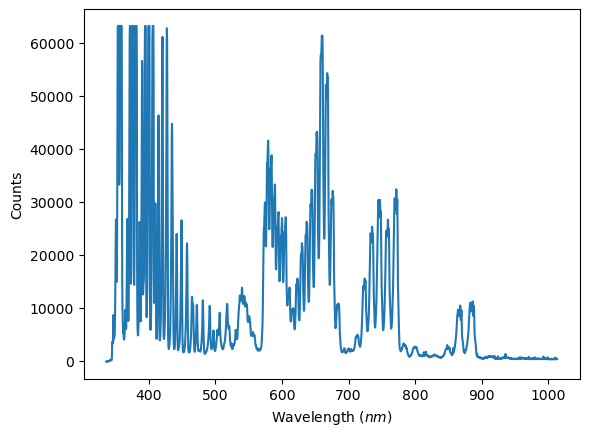

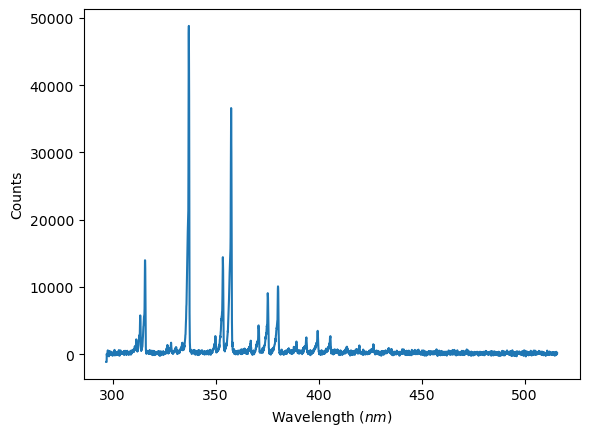

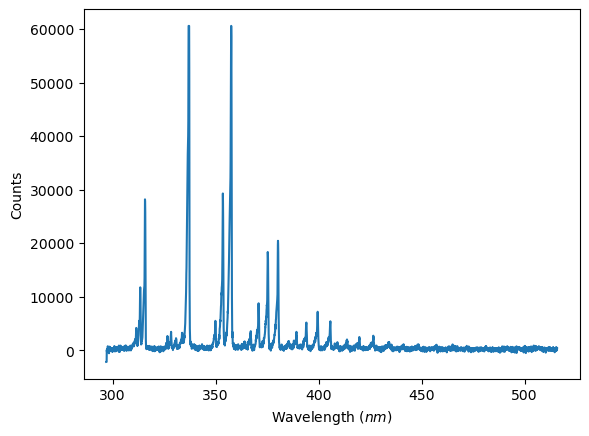

In [150]:
for name, df in data_frames2.items():
    plt.plot(df['Wavelength'], df['Counts'], label=name)
    plt.xlabel('Wavelength $(nm)$')
    plt.ylabel('Counts')
    plt.show()

In [161]:
Output_N2_T_Spectrum = pd.read_csv('outputN2_T_Spectrum.csv')
Output_N2_T_Spectrum['Wavenumber']=1/Output_N2_T_Spectrum['mean']
Output_N2_T_Spectrum['WavenumberErr']=Output_N2_T_Spectrum['tomeanErr']/Output_N2_T_Spectrum['mean']**2
Output_N2_T_Spectrum.to_csv('outputN2_T_Spectrum.csv', index=False)
print(Output_N2_T_Spectrum['mean'],'\n',Output_N2_T_Spectrum['Wavenumber'], '\n', Output_N2_T_Spectrum['WavenumberErr'])

0     310.842189
1     311.507769
2     313.430896
3     315.775133
4     326.670302
5     328.346902
6     330.874001
7     333.800647
8     336.172070
9     337.022641
10    349.902034
11    354.548210
12    353.007535
13    353.534760
14    353.799902
15    357.548860
16    357.650651
17    366.434121
18    366.978541
19    370.154053
20    370.872571
21    375.345691
22    380.293758
23    387.985789
24    389.213329
25    393.313158
26    394.024733
27    398.898504
28    399.519680
29    407.155664
30    405.632997
31    410.838975
32    419.746178
33    426.601278
Name: mean, dtype: float64 
 0     0.003217
1     0.003210
2     0.003190
3     0.003167
4     0.003061
5     0.003046
6     0.003022
7     0.002996
8     0.002975
9     0.002967
10    0.002858
11    0.002820
12    0.002833
13    0.002829
14    0.002826
15    0.002797
16    0.002796
17    0.002729
18    0.002725
19    0.002702
20    0.002696
21    0.002664
22    0.002630
23    0.002577
24    0.002569
25    0.002543
26 